In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\4128595673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\4128595673.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


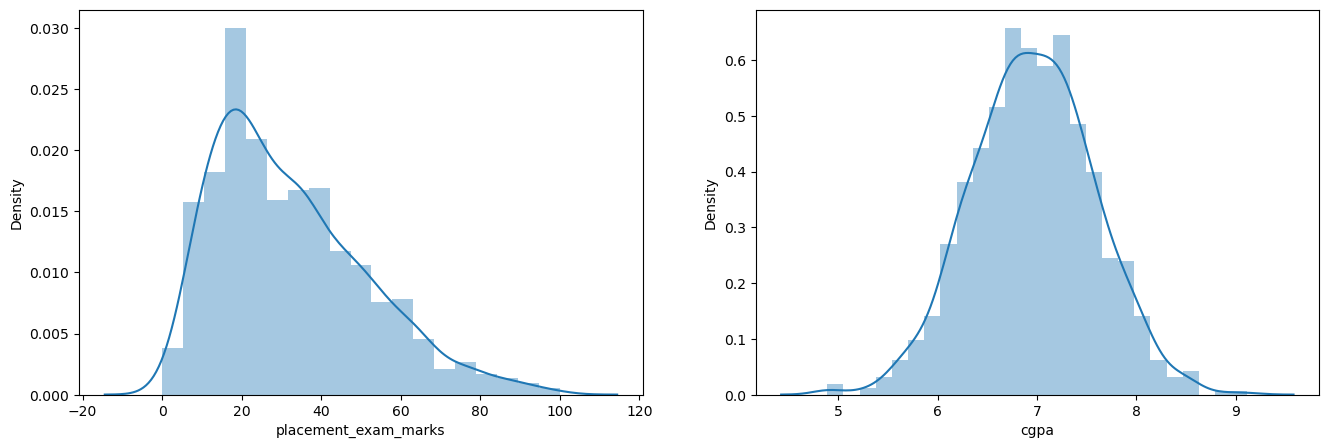

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(df['cgpa'])

plt.show()

## so palcement_exam_marks graph is skewed graph so we apply IQR in this only 

In [8]:
df["placement_exam_marks"].skew()       # if this value is close to 0 and this graph is normally distributed 

0.8356419499466834

<Axes: ylabel='placement_exam_marks'>

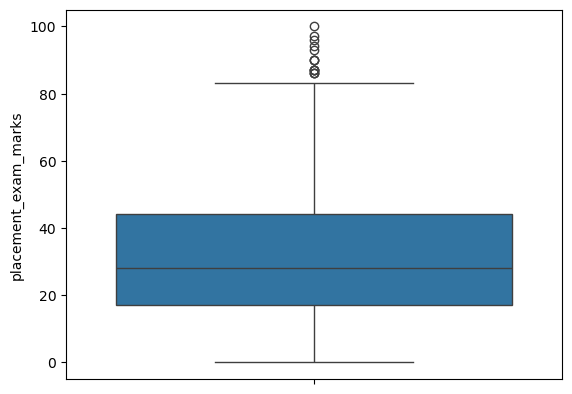

In [9]:
sns.boxplot(df["placement_exam_marks"])  # there are +outliers is the coloumn

In [17]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [25]:
Q1_percentile = df['placement_exam_marks'].quantile(0.25)
Q2_percentile = df['placement_exam_marks'].quantile(0.75)

In [26]:
Q1_percentile , Q2_percentile

(17.0, 44.0)

In [27]:
IQR = Q2_percentile - Q1_percentile
IQR

27.0

In [28]:
upper_limit = Q2_percentile + 1.5*IQR
lower_limit = Q1_percentile - 1.5*IQR

In [29]:
upper_limit, lower_limit

(84.5, -23.5)

In [34]:
df[df['placement_exam_marks']>84.5]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [35]:
df[df['placement_exam_marks']<-23.5]      # there is no negative outlier

,cgpa,placement_exam_marks,placed


In [30]:
df[(df['placement_exam_marks']>84.5)| (df['placement_exam_marks']<-23.5)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [38]:
new_df = df[df['placement_exam_marks']<84.5]

In [39]:
new_df.shape

(985, 3)

C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\4255986531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\4255986531.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<function matplotlib.pyplot.show(close=None, block=None)>

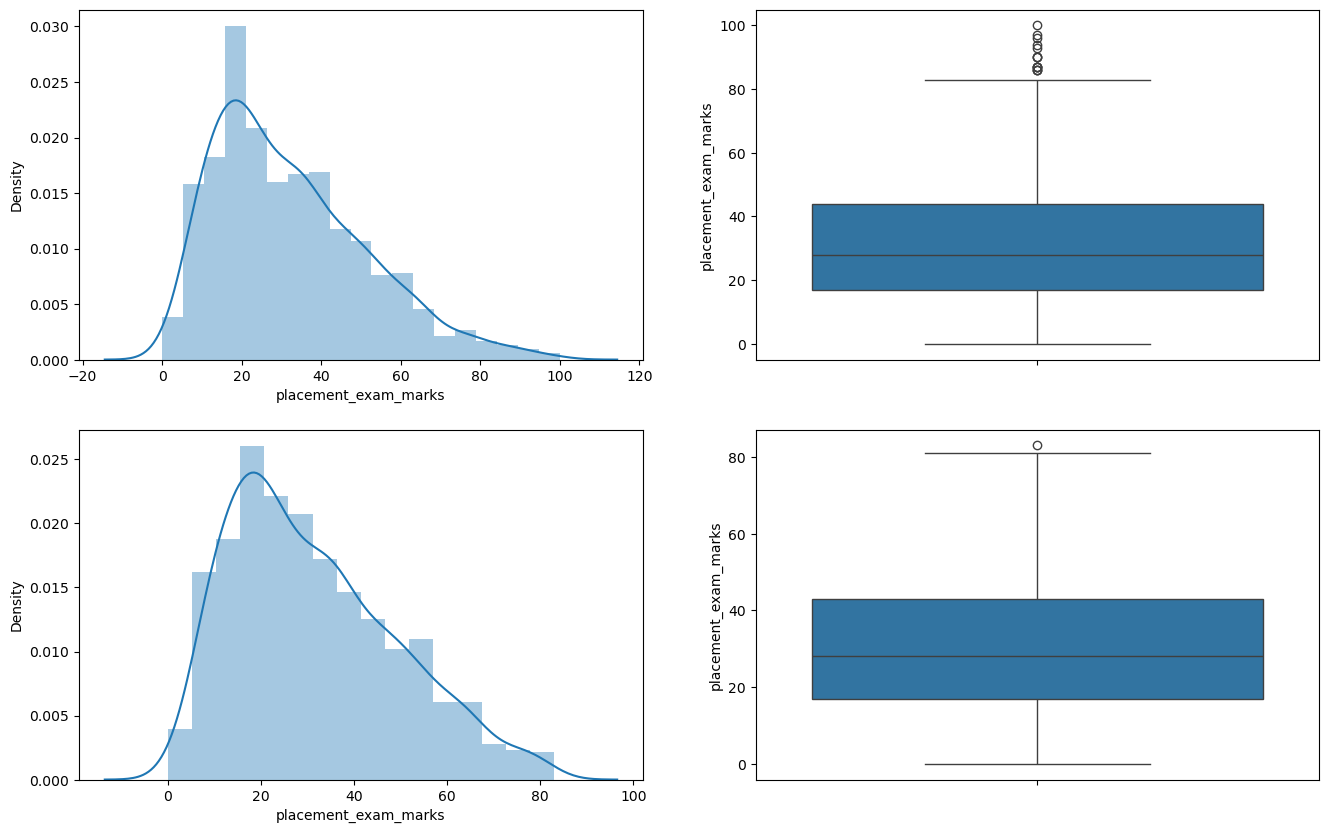

In [46]:
#Comparring
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show

# Capping

In [48]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks']>upper_limit,upper_limit,
                                             np.where(
                                                 new_df_cap['placement_exam_marks']<lower_limit,lower_limit,
                                                 new_df_cap['placement_exam_marks']
                                             ))

In [50]:
new_df_cap.shape

(1000, 3)

C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\3362528684.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\rajv6\AppData\Local\Temp\ipykernel_11132\3362528684.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


<function matplotlib.pyplot.show(close=None, block=None)>

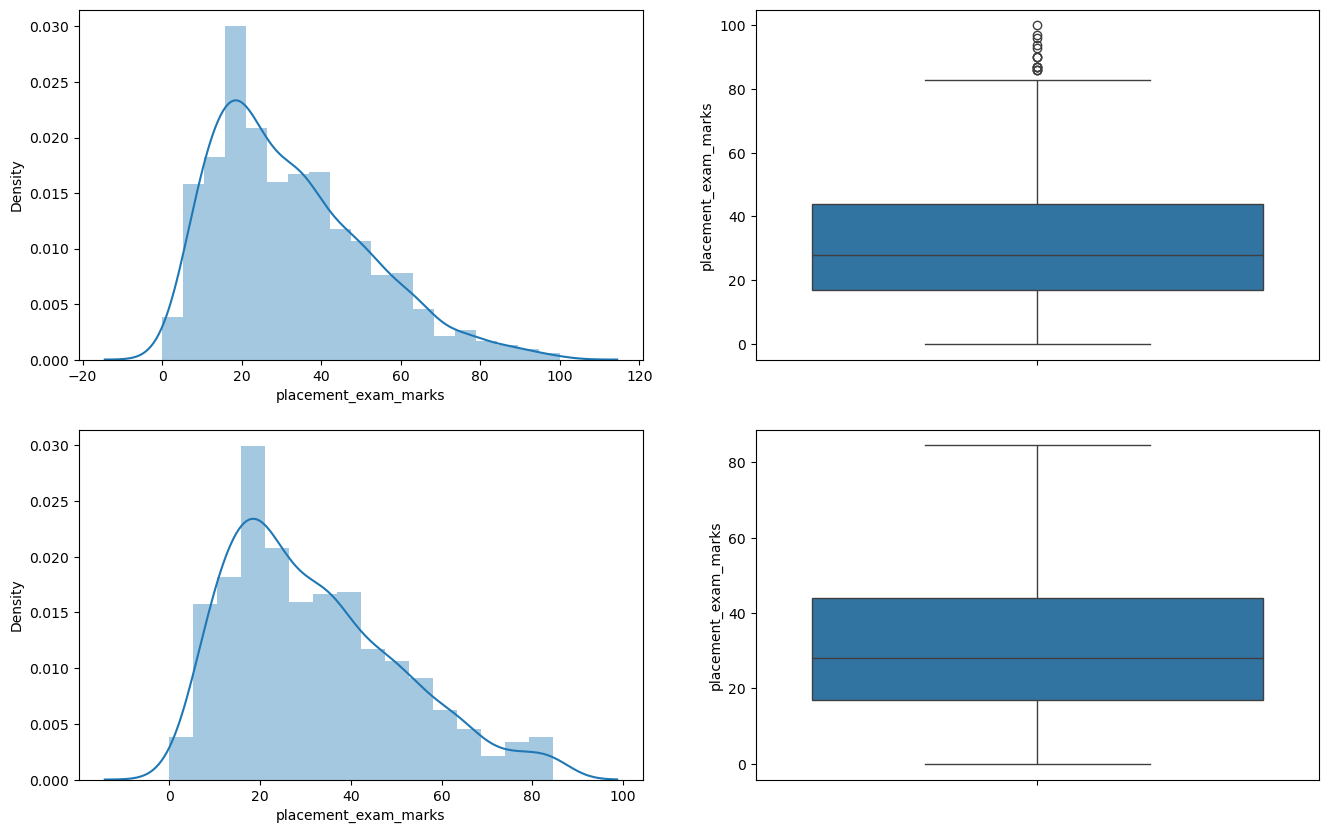

In [51]:
#Comparring
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])



plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show